In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.DataFrame([[4,11],[8,4],[13,5],[7,14]])


# calculate Pca -mathematically method
-1.calculate mean
-2.cal center value
-3.cal covariance matrix
-4.calculate eigen values and vectors
-5.calculate pca (eigen values *eigen vectors)

In [5]:
df

,0,1
0,4,11
1,8,4
2,13,5
3,7,14


In [6]:
df_mean=df.mean()
df_mean

0    8.0
1    8.5
dtype: float64

# Step2=calculate the center values

In [7]:
df_center=df-df_mean
df_center

,0,1
0,-4.0,2.5
1,0.0,-4.5
2,5.0,-3.5
3,-1.0,5.5


In [8]:
#step3=calculate covariance matrix
df_cov=np.cov(df_center.T)
df_cov

array([[ 14., -11.],
       [-11.,  23.]])

# step4=calculate the eigen values and eigen vectors

In [9]:
eig_vals,eig_vects=np.linalg.eig(df_cov)

In [10]:
eig_vals

array([ 6.61513568, 30.38486432])

In [11]:
eig_vects

array([[-0.83025082,  0.55738997],
       [-0.55738997, -0.83025082]])

# setp-5 calculate the pca

In [12]:
df_center

,0,1
0,-4.0,2.5
1,0.0,-4.5
2,5.0,-3.5
3,-1.0,5.5


In [13]:
df_center.T

,0,1,2,3
0,-4.0,0.0,5.0,-1.0
1,2.5,-4.5,-3.5,5.5


In [14]:
eig_vects

array([[-0.83025082,  0.55738997],
       [-0.55738997, -0.83025082]])

In [15]:
eig_vects.T

array([[-0.83025082, -0.55738997],
       [ 0.55738997, -0.83025082]])

In [16]:
df_pca=eig_vects.T.dot(df_center.T)
df_pca

array([[ 1.92752836,  2.50825486, -2.20038921, -2.23539401],
       [-4.30518692,  3.73612869,  5.69282771, -5.12376947]])

In [17]:
df_pca.T

array([[ 1.92752836, -4.30518692],
       [ 2.50825486,  3.73612869],
       [-2.20038921,  5.69282771],
       [-2.23539401, -5.12376947]])

# pca library

In [18]:
#reducing features

In [19]:
from sklearn.decomposition import PCA

In [20]:
df

,0,1
0,4,11
1,8,4
2,13,5
3,7,14


In [21]:
#PCA(n_components=2)

In [22]:
alg=PCA(n_components=2)
alg.fit(df)

PCA(n_components=2)

In [23]:
alg.transform(df)

array([[-4.30518692,  1.92752836],
       [ 3.73612869,  2.50825486],
       [ 5.69282771, -2.20038921],
       [-5.12376947, -2.23539401]])

In [24]:
alg.explained_variance_ratio_

array([0.82121255, 0.17878745])

In [25]:
 #PCA(n_components=1)

In [26]:
alg1=PCA(n_components=1)

In [27]:
alg1.fit(df)

PCA(n_components=1)

In [28]:
alg1.transform(df)

array([[-4.30518692],
       [ 3.73612869],
       [ 5.69282771],
       [-5.12376947]])

In [29]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv(r"heart.csv")

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
[df.shape,df.size]

[(303, 14), 4242]

In [34]:
#create seperate objects for target & input features

In [35]:

#seperate the target feaature
y=df["target"]

#seperate the object from input features
x=df.drop('target',axis=1)

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [37]:
y.shape

(303,)

# #perform pca

In [38]:
from sklearn.decomposition import PCA

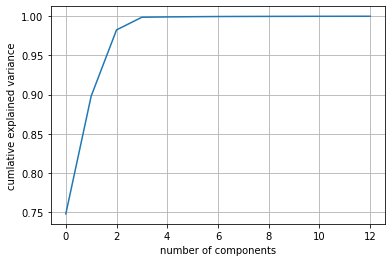

In [39]:
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumlative explained variance")
plt.grid()

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7475642 , 0.89793442, 0.98253127, 0.99874723, 0.99913131,
       0.99941255, 0.99964154, 0.99974137, 0.99981859, 0.99987733,
       0.99992762, 0.99996859, 1.        ])

In [41]:
from sklearn.decomposition import PCA

In [42]:
p_c_a=PCA(n_components=5)
p_c_a.fit(x)
x_pca=p_c_a.transform(x)

In [43]:
x_pca

array([[-1.22673448e+01,  2.87383781e+00,  1.49698788e+01,
         6.89294010e+00, -7.24684246e-02],
       [ 2.69013712e+00, -3.98713736e+01,  8.77882303e-01,
        -1.05835985e+01,  2.59877308e+00],
       [-4.29502141e+01, -2.36368199e+01,  1.75944589e+00,
        -7.78665510e+00,  4.36244100e-01],
       ...,
       [-5.19638115e+01,  1.33237984e+01,  1.54868436e+01,
         1.16374553e+01,  2.49540197e+00],
       [-1.14755981e+02,  3.64351842e+01,  1.27770952e-01,
         5.11386328e-01,  1.65577279e-01],
       [-1.03961420e+01, -2.33024008e+01,  2.39130354e+00,
         7.18326419e+00, -1.54578561e-01]])

In [46]:
pca=PCA(n_components=4)
principalComponents=pca.fit_transform(x)
principalDataframe=pd.DataFrame(data=principalComponents,columns=["PC1","PC2","PC3","PC4"])
principalDataframe.head()

,PC1,PC2,PC3,PC4
0,-12.267345,2.873838,14.969879,6.892940
1,2.690137,-39.871374,0.877882,-10.583598
2,-42.950214,-23.636820,1.759446,-7.786655
3,-10.944756,-28.438036,-7.044180,8.328134
4,106.979053,-15.874468,-14.861575,3.223808


In [47]:
newDataframe=pd.concat([principalDataframe,y],axis=1)
newDataframe.head()

,PC1,PC2,PC3,PC4,target
0,-12.267345,2.873838,14.969879,6.892940,1
1,2.690137,-39.871374,0.877882,-10.583598,1
2,-42.950214,-23.636820,1.759446,-7.786655,1
3,-10.944756,-28.438036,-7.044180,8.328134,1
4,106.979053,-15.874468,-14.861575,3.223808,1


In [48]:
  x.shape

(303, 13)

In [49]:
x_pca.shape

(303, 5)